In [7]:
import pandas as pd
# Import required libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully")

✅ All libraries imported successfully


In [23]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# read csv file
data = pd.read_csv('Students_Cleaned_Encoded_correlation_optimized.csv')

In [4]:
# top 5
data.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_project_work,uses_exam_preparation,uses_doubt_solving,uses_content_writing,...,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Tablet,internet_access_High,internet_access_Medium,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,3.6,5,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2,2.9,5,2,5,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,1,0.9,1,3,8,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,1


In [5]:
# column names
data.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level', 'uses_coding_help',
       'uses_project_work', 'uses_exam_preparation', 'uses_doubt_solving',
       'uses_content_writing', 'uses_learning_new_topics', 'ai_tool_bard',
       'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Tablet', 'internet_access_High', 'internet_access_Medium',
       'Do_Professors_Allow_Use_encoded', 'Willing_to_Pay_for_Access_encoded'],
      dtype='object')

# Daily_Usage_Hours

In [6]:
# Setup target variable and predictors
target = 'Daily_Usage_Hours'
X = data.drop(columns=[target])
y = data[target]

print("=== DATA SETUP ===")
print(f"Target variable: {target}")
print(f"Number of predictors: {len(X.columns)}")
print(f"Target range: {y.min():.1f} to {y.max():.1f}")
print(f"Target mean: {y.mean():.2f}")
print(f"Dataset shape: {data.shape}")

=== DATA SETUP ===
Target variable: Daily_Usage_Hours
Number of predictors: 28
Target range: 0.5 to 5.0
Target mean: 2.56
Dataset shape: (3614, 29)


In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # Since it's regression
)

print("=== DATA SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target range: {y_train.min():.1f} to {y_train.max():.1f}")
print(f"Test target range: {y_test.min():.1f} to {y_test.max():.1f}")

=== DATA SPLIT ===
Training set: 2891 samples
Test set: 723 samples
Training target range: 0.5 to 5.0
Test target range: 0.5 to 5.0


# 🔄 Linear Regression Models

This section focuses specifically on training and evaluating various linear regression models using `Daily_Usage_Hours` as the target variable and all other features as predictors.

In [16]:
# # 🔄 COMPREHENSIVE LINEAR REGRESSION ANALYSIS
# def train_linear_regression_models(X_train, X_test, y_train, y_test):
#     """
#     Train and evaluate various linear regression models
#     """
#     print("=" * 80)
#     print("🔄 LINEAR REGRESSION MODELS TRAINING")
#     print("=" * 80)
    
#     # Define linear regression models
#     linear_models = {
#         'Linear Regression': {
#             'model': LinearRegression(),
#             'params': {},
#             'description': 'Basic linear regression with no regularization'
#         },
#         'Ridge Regression': {
#             'model': Ridge(),
#             'params': {'alpha': [0.1, 1.0, 10.0, 100.0]},
#             'description': 'L2 regularization to prevent overfitting'
#         },
#         'Lasso Regression': {
#             'model': Lasso(),
#             'params': {'alpha': [0.1, 1.0, 10.0, 100.0]},
#             'description': 'L1 regularization with feature selection'
#         },
#         'ElasticNet': {
#             'model': ElasticNet(),
#             'params': {
#                 'alpha': [0.1, 1.0, 10.0],
#                 'l1_ratio': [0.1, 0.5, 0.9]
#             },
#             'description': 'Combines L1 and L2 regularization'
#         }
#     }
    
#     # Scale features for linear models (they are sensitive to feature scale)
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     print(f"📊 Training {len(linear_models)} linear regression models...")
#     print(f"📊 Using scaled features for optimal performance")
#     print(f"📊 Target: Daily_Usage_Hours (range: {y_train.min():.1f} to {y_train.max():.1f})")
#     print()
    
#     results = {}
    
#     for model_name, config in linear_models.items():
#         print(f"🔧 Training {model_name}...")
#         print(f"   Description: {config['description']}")
        
#         model = config['model']
        
#         # Hyperparameter tuning if parameters are specified
#         if config['params']:
#             print(f"   🎯 Performing hyperparameter tuning...")
#             grid_search = GridSearchCV(
#                 model,
#                 config['params'],
#                 cv=5,
#                 scoring='r2',
#                 n_jobs=-1
#             )
#             grid_search.fit(X_train_scaled, y_train)
#             best_model = grid_search.best_estimator_
#             best_params = grid_search.best_params_
#             best_cv_score = grid_search.best_score_
#             print(f"   ✅ Best parameters: {best_params}")
#             print(f"   ✅ Best CV score: {best_cv_score:.4f}")
#         else:
#             best_model = model
#             best_params = {}
#             best_cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2').mean()
        
#         # Train final model
#         best_model.fit(X_train_scaled, y_train)
        
#         # Predictions
#         y_pred_train = best_model.predict(X_train_scaled)
#         y_pred_test = best_model.predict(X_test_scaled)
        
#         # Calculate metrics
#         train_r2 = r2_score(y_train, y_pred_train)
#         test_r2 = r2_score(y_test, y_pred_test)
#         train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
#         test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
#         test_mae = mean_absolute_error(y_test, y_pred_test)
        
#         # Cross-validation scores
#         cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')
        
#         # Store results
#         results[model_name] = {
#             'model': best_model,
#             'scaler': scaler,
#             'best_params': best_params,
#             'cv_score': best_cv_score,
#             'train_r2': train_r2,
#             'test_r2': test_r2,
#             'train_rmse': train_rmse,
#             'test_rmse': test_rmse,
#             'test_mae': test_mae,
#             'cv_scores': cv_scores,
#             'predictions': y_pred_test
#         }
        
#         print(f"   📈 Results:")
#         print(f"      Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
#         print(f"      Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
#         print(f"      CV R² (mean±std): {cv_scores.mean():.4f}±{cv_scores.std():.4f}")
#         print()
    
#     return results, scaler

# # Train linear regression models
# linear_results, feature_scaler = train_linear_regression_models(X_train, X_test, y_train, y_test)

In [17]:
# # 📊 LINEAR REGRESSION RESULTS ANALYSIS
# def analyze_linear_regression_results(results):
#     """
#     Analyze and visualize linear regression results
#     """
#     print("=" * 80)
#     print("📊 LINEAR REGRESSION RESULTS ANALYSIS")
#     print("=" * 80)
    
#     # Create results summary
#     summary_data = []
#     for model_name, metrics in results.items():
#         summary_data.append({
#             'Model': model_name,
#             'CV_R2': metrics['cv_score'],
#             'Test_R2': metrics['test_r2'],
#             'Test_RMSE': metrics['test_rmse'],
#             'Test_MAE': metrics['test_mae'],
#             'Overfitting': metrics['train_r2'] - metrics['test_r2']
#         })
    
#     # Sort by test R²
#     summary_data.sort(key=lambda x: x['Test_R2'], reverse=True)
    
#     print("🏆 LINEAR REGRESSION MODEL RANKING:")
#     print("-" * 80)
#     print(f"{'Rank':<4} {'Model':<18} {'CV R²':<8} {'Test R²':<8} {'RMSE':<8} {'MAE':<8} {'Overfitting':<12}")
#     print("-" * 80)
    
#     for i, result in enumerate(summary_data, 1):
#         overfit_status = "High" if result['Overfitting'] > 0.1 else "Low" if result['Overfitting'] < 0.05 else "Medium"
#         print(f"{i:<4} {result['Model']:<18} {result['CV_R2']:<8.4f} {result['Test_R2']:<8.4f} "
#               f"{result['Test_RMSE']:<8.4f} {result['Test_MAE']:<8.4f} {overfit_status:<12}")
    
#     # Best model analysis
#     best_model_name = summary_data[0]['Model']
#     best_model = results[best_model_name]
    
#     print(f"\n🎯 BEST LINEAR MODEL: {best_model_name}")
#     print(f"   Test R²: {best_model['test_r2']:.4f} ({best_model['test_r2']*100:.1f}% variance explained)")
#     print(f"   Test RMSE: {best_model['test_rmse']:.4f} hours")
#     print(f"   Test MAE: {best_model['test_mae']:.4f} hours")
#     print(f"   Best Parameters: {best_model['best_params']}")
    
#     # Performance interpretation
#     print(f"\n🔍 PERFORMANCE INTERPRETATION:")
#     if best_model['test_r2'] > 0.7:
#         print("   ✅ Excellent: Model explains >70% of variance")
#     elif best_model['test_r2'] > 0.5:
#         print("   ✅ Good: Model explains >50% of variance")
#     elif best_model['test_r2'] > 0.3:
#         print("   ⚠️ Moderate: Model explains >30% of variance")
#     elif best_model['test_r2'] > 0.1:
#         print("   ⚠️ Weak: Model explains >10% of variance")
#     else:
#         print("   ❌ Poor: Model explains <10% of variance")
    
#     # Prediction accuracy
#     avg_error = best_model['test_mae']
#     print(f"   📊 Average prediction error: ±{avg_error:.2f} hours")
    
#     if avg_error < 0.5:
#         print("   ✅ High accuracy: Predictions within 0.5 hours on average")
#     elif avg_error < 1.0:
#         print("   ✅ Good accuracy: Predictions within 1 hour on average")
#     elif avg_error < 2.0:
#         print("   ⚠️ Moderate accuracy: Predictions within 2 hours on average")
#     else:
#         print("   ❌ Low accuracy: Predictions may be off by 2+ hours")
    
#     return summary_data, best_model_name

# # Analyze linear regression results
# linear_summary, best_linear_model = analyze_linear_regression_results(linear_results)

In [18]:
# # 📈 LINEAR REGRESSION VISUALIZATION
# def visualize_linear_regression(results, X_test, y_test, best_model_name):
#     """
#     Create comprehensive visualizations for linear regression results
#     """
#     print("=" * 80)
#     print("📈 LINEAR REGRESSION VISUALIZATION")
#     print("=" * 80)
    
#     # Create subplots
#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))
#     fig.suptitle('Linear Regression Models Analysis', fontsize=16, fontweight='bold')
    
#     # 1. Model Performance Comparison
#     model_names = list(results.keys())
#     test_r2_scores = [results[name]['test_r2'] for name in model_names]
#     test_rmse_scores = [results[name]['test_rmse'] for name in model_names]
    
#     x_pos = np.arange(len(model_names))
    
#     # R² comparison
#     bars1 = axes[0, 0].bar(x_pos, test_r2_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
#     axes[0, 0].set_title('Model Performance - R² Score')
#     axes[0, 0].set_ylabel('R² Score')
#     axes[0, 0].set_xticks(x_pos)
#     axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
#     axes[0, 0].grid(axis='y', alpha=0.3)
    
#     # Add value labels on bars
#     for i, v in enumerate(test_r2_scores):
#         axes[0, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
#     # RMSE comparison
#     bars2 = axes[0, 1].bar(x_pos, test_rmse_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
#     axes[0, 1].set_title('Model Performance - RMSE')
#     axes[0, 1].set_ylabel('RMSE (hours)')
#     axes[0, 1].set_xticks(x_pos)
#     axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
#     axes[0, 1].grid(axis='y', alpha=0.3)
    
#     # Add value labels on bars
#     for i, v in enumerate(test_rmse_scores):
#         axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
#     # 2. Predictions vs Actual (Best Model)
#     best_model = results[best_model_name]
#     y_pred_best = best_model['predictions']
    
#     axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6, color='#4ECDC4', edgecolors='black', linewidth=0.5)
#     axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
#     axes[1, 0].set_xlabel('Actual Daily Usage Hours')
#     axes[1, 0].set_ylabel('Predicted Daily Usage Hours')
#     axes[1, 0].set_title(f'Predictions vs Actual - {best_model_name}')
#     axes[1, 0].grid(alpha=0.3)
    
#     # Add R² annotation
#     axes[1, 0].text(0.05, 0.95, f'R² = {best_model["test_r2"]:.3f}', 
#                    transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold',
#                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
#     # 3. Residuals Analysis
#     residuals = y_test - y_pred_best
#     axes[1, 1].scatter(y_pred_best, residuals, alpha=0.6, color='#FF6B6B', edgecolors='black', linewidth=0.5)
#     axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.8)
#     axes[1, 1].set_xlabel('Predicted Daily Usage Hours')
#     axes[1, 1].set_ylabel('Residuals')
#     axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')
#     axes[1, 1].grid(alpha=0.3)
    
#     # Add residuals statistics
#     residuals_std = np.std(residuals)
#     axes[1, 1].text(0.05, 0.95, f'Residuals Std = {residuals_std:.3f}', 
#                    transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold',
#                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
#     plt.tight_layout()
#     plt.show()
    
#     return fig

# # Create visualizations
# visualization_fig = visualize_linear_regression(linear_results, X_test, y_test, best_linear_model)

In [19]:
# # 🔍 LINEAR REGRESSION FEATURE IMPORTANCE
# def analyze_linear_regression_coefficients(results, X_train, best_model_name):
#     """
#     Analyze feature importance and coefficients for linear regression models
#     """
#     print("=" * 80)
#     print("🔍 LINEAR REGRESSION FEATURE IMPORTANCE ANALYSIS")
#     print("=" * 80)
    
#     best_model = results[best_model_name]['model']
#     feature_names = X_train.columns
    
#     # Get coefficients
#     if hasattr(best_model, 'coef_'):
#         coefficients = best_model.coef_
#         intercept = best_model.intercept_
        
#         # Create feature importance dataframe
#         coef_df = pd.DataFrame({
#             'feature': feature_names,
#             'coefficient': coefficients,
#             'abs_coefficient': np.abs(coefficients)
#         }).sort_values('abs_coefficient', ascending=False)
        
#         print(f"🎯 {best_model_name} - Feature Coefficients Analysis")
#         print(f"   Intercept: {intercept:.4f}")
#         print(f"   Number of features: {len(coefficients)}")
#         print(f"   Non-zero coefficients: {np.sum(coefficients != 0)}")
        
#         # Top positive coefficients
#         print(f"\n📈 TOP 10 POSITIVE COEFFICIENTS (increase Daily Usage):")
#         positive_coef = coef_df[coef_df['coefficient'] > 0].head(10)
#         for i, (_, row) in enumerate(positive_coef.iterrows(), 1):
#             print(f"   {i:2d}. {row['feature']:<30} +{row['coefficient']:.4f}")
        
#         # Top negative coefficients
#         print(f"\n📉 TOP 10 NEGATIVE COEFFICIENTS (decrease Daily Usage):")
#         negative_coef = coef_df[coef_df['coefficient'] < 0].head(10)
#         for i, (_, row) in enumerate(negative_coef.iterrows(), 1):
#             print(f"   {i:2d}. {row['feature']:<30} {row['coefficient']:.4f}")
        
#         # Feature importance visualization
#         fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
#         # Top 15 features by absolute coefficient
#         top_features = coef_df.head(15)
#         colors = ['green' if coef > 0 else 'red' for coef in top_features['coefficient']]
        
#         axes[0].barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
#         axes[0].set_yticks(range(len(top_features)))
#         axes[0].set_yticklabels(top_features['feature'])
#         axes[0].set_xlabel('Coefficient Value')
#         axes[0].set_title(f'{best_model_name} - Top 15 Feature Coefficients')
#         axes[0].grid(axis='x', alpha=0.3)
#         axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.5)
        
#         # Coefficient distribution
#         axes[1].hist(coefficients, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
#         axes[1].set_xlabel('Coefficient Value')
#         axes[1].set_ylabel('Frequency')
#         axes[1].set_title('Distribution of All Coefficients')
#         axes[1].grid(axis='y', alpha=0.3)
#         axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
        
#         plt.tight_layout()
#         plt.show()
        
#         # Model interpretation
#         print(f"\n🎯 MODEL INTERPRETATION:")
#         print(f"   • Positive coefficients: Features that increase Daily Usage Hours")
#         print(f"   • Negative coefficients: Features that decrease Daily Usage Hours")
#         print(f"   • Larger absolute values: Stronger impact on prediction")
        
#         # Check for regularization effects
#         zero_coef_count = np.sum(coefficients == 0)
#         if zero_coef_count > 0:
#             print(f"   • Zero coefficients: {zero_coef_count} features eliminated by regularization")
        
#         return coef_df
#     else:
#         print(f"❌ {best_model_name} does not have interpretable coefficients")
#         return None

# # Analyze feature importance
# feature_coefficients = analyze_linear_regression_coefficients(linear_results, X_train, best_linear_model)

In [20]:
# # 📋 LINEAR REGRESSION MODEL VALIDATION
# def validate_linear_regression_assumptions(results, X_test, y_test, best_model_name):
#     """
#     Validate linear regression assumptions and provide model diagnostics
#     """
#     print("=" * 80)
#     print("📋 LINEAR REGRESSION MODEL VALIDATION")
#     print("=" * 80)
    
#     best_model = results[best_model_name]['model']
#     scaler = results[best_model_name]['scaler']
#     y_pred = results[best_model_name]['predictions']
#     residuals = y_test - y_pred
    
#     print(f"🔍 Validating assumptions for {best_model_name}:")
    
#     # 1. Linearity check
#     print(f"\n1. LINEARITY:")
#     correlation_pred_actual = np.corrcoef(y_test, y_pred)[0, 1]
#     print(f"   Correlation between actual and predicted: {correlation_pred_actual:.4f}")
#     if correlation_pred_actual > 0.7:
#         print("   ✅ Strong linear relationship")
#     elif correlation_pred_actual > 0.5:
#         print("   ⚠️ Moderate linear relationship")
#     else:
#         print("   ❌ Weak linear relationship - may need non-linear model")
    
#     # 2. Residuals normality
#     print(f"\n2. RESIDUALS NORMALITY:")
#     from scipy import stats
#     shapiro_stat, shapiro_p = stats.shapiro(residuals[:1000])  # Sample for large datasets
#     print(f"   Shapiro-Wilk test p-value: {shapiro_p:.4f}")
#     if shapiro_p > 0.05:
#         print("   ✅ Residuals are normally distributed")
#     else:
#         print("   ⚠️ Residuals deviate from normal distribution")
    
#     # 3. Homoscedasticity (constant variance)
#     print(f"\n3. HOMOSCEDASTICITY:")
#     residuals_std = np.std(residuals)
#     print(f"   Residuals standard deviation: {residuals_std:.4f}")
    
#     # Check for patterns in residuals
#     correlation_pred_residuals = np.corrcoef(y_pred, residuals)[0, 1]
#     print(f"   Correlation between predictions and residuals: {correlation_pred_residuals:.4f}")
#     if abs(correlation_pred_residuals) < 0.1:
#         print("   ✅ Homoscedasticity assumption satisfied")
#     else:
#         print("   ⚠️ Heteroscedasticity detected - residuals show patterns")
    
#     # 4. Model performance metrics
#     print(f"\n4. MODEL PERFORMANCE SUMMARY:")
#     print(f"   R² Score: {results[best_model_name]['test_r2']:.4f}")
#     print(f"   RMSE: {results[best_model_name]['test_rmse']:.4f} hours")
#     print(f"   MAE: {results[best_model_name]['test_mae']:.4f} hours")
#     print(f"   Cross-validation R² (mean±std): {results[best_model_name]['cv_scores'].mean():.4f}±{results[best_model_name]['cv_scores'].std():.4f}")
    
#     # 5. Prediction intervals
#     print(f"\n5. PREDICTION ACCURACY:")
#     within_1_std = np.sum(np.abs(residuals) <= residuals_std) / len(residuals)
#     within_2_std = np.sum(np.abs(residuals) <= 2 * residuals_std) / len(residuals)
    
#     print(f"   Predictions within 1 std ({residuals_std:.2f}h): {within_1_std:.1%}")
#     print(f"   Predictions within 2 std ({2*residuals_std:.2f}h): {within_2_std:.1%}")
    
#     # Overall assessment
#     print(f"\n🎯 OVERALL MODEL ASSESSMENT:")
#     r2_score = results[best_model_name]['test_r2']
    
#     if r2_score > 0.7:
#         assessment = "✅ EXCELLENT - Model is highly predictive and suitable for deployment"
#     elif r2_score > 0.5:
#         assessment = "✅ GOOD - Model has good predictive power and can be used"
#     elif r2_score > 0.3:
#         assessment = "⚠️ MODERATE - Model has some predictive power but may need improvement"
#     elif r2_score > 0.1:
#         assessment = "⚠️ WEAK - Model has limited predictive power"
#     else:
#         assessment = "❌ POOR - Model is not suitable for prediction"
    
#     print(f"   {assessment}")
    
#     return {
#         'correlation_pred_actual': correlation_pred_actual,
#         'shapiro_p': shapiro_p,
#         'correlation_pred_residuals': correlation_pred_residuals,
#         'residuals_std': residuals_std,
#         'within_1_std': within_1_std,
#         'within_2_std': within_2_std
#     }

# # Validate linear regression model
# validation_results = validate_linear_regression_assumptions(linear_results, X_test, y_test, best_linear_model)

In [21]:
# Check your data types and ranges
def analyze_feature_scaling_needs(X):
    """Analyze which features need scaling"""
    
    print("=== FEATURE SCALING ANALYSIS ===\n")
    
    # Identify binary/one-hot columns (only 0s and 1s)
    binary_columns = []
    continuous_columns = []
    
    for col in X.columns:
        unique_vals = sorted(X[col].unique())
        
        # Check if column is binary (only 0 and 1)
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns.append(col)
        # Check if column has more than 2 unique values
        elif len(unique_vals) > 2:
            continuous_columns.append(col)
    
    print(f"📊 Binary/One-hot columns ({len(binary_columns)}): DON'T need scaling")
    for col in binary_columns[:10]:  # Show first 10
        print(f"   - {col}: {sorted(X[col].unique())}")
    if len(binary_columns) > 10:
        print(f"   ... and {len(binary_columns)-10} more binary columns")
    
    print(f"\n📈 Continuous columns ({len(continuous_columns)}): NEED scaling")
    for col in continuous_columns:
        print(f"   - {col}: range {X[col].min():.2f} to {X[col].max():.2f}")
    
    return binary_columns, continuous_columns

# Analyze your features
binary_cols, continuous_cols = analyze_feature_scaling_needs(X)

=== FEATURE SCALING ANALYSIS ===

📊 Binary/One-hot columns (24): DON'T need scaling
   - uses_coding_help: [0, 1]
   - uses_project_work: [0, 1]
   - uses_exam_preparation: [0, 1]
   - uses_doubt_solving: [0, 1]
   - uses_content_writing: [0, 1]
   - uses_learning_new_topics: [0, 1]
   - ai_tool_bard: [0, 1]
   - ai_tool_chatgpt: [0, 1]
   - ai_tool_claude: [0, 1]
   - ai_tool_copilot: [0, 1]
   ... and 14 more binary columns

📈 Continuous columns (4): NEED scaling
   - Year_of_Study: range 1.00 to 4.00
   - Trust_in_AI_Tools: range 1.00 to 5.00
   - Impact_on_Grades: range -5.00 to 5.00
   - Awareness_Level: range 1.00 to 10.00


In [22]:
# Selective feature scaling - only scale continuous features
def selective_feature_scaling(X_train, X_test, continuous_columns):
    """Scale only continuous features, leave binary features unchanged"""
    
    if not continuous_columns:
        print("✅ No continuous features found - no scaling needed")
        return X_train.copy(), X_test.copy(), None
    
    print(f"🔧 Scaling {len(continuous_columns)} continuous features...")
    
    # Create copies
    X_train_selective = X_train.copy()
    X_test_selective = X_test.copy()
    
    # Scale only continuous columns
    scaler = StandardScaler()
    X_train_selective[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
    X_test_selective[continuous_columns] = scaler.transform(X_test[continuous_columns])
    
    print("✅ Selective scaling completed")
    print(f"   - Binary columns: unchanged (0/1 values)")
    print(f"   - Continuous columns: standardized (mean=0, std=1)")
    
    return X_train_selective, X_test_selective, scaler

# Apply selective scaling
X_train_selective, X_test_selective, selective_scaler = selective_feature_scaling(X_train, X_test, continuous_cols)

🔧 Scaling 4 continuous features...
✅ Selective scaling completed
   - Binary columns: unchanged (0/1 values)
   - Continuous columns: standardized (mean=0, std=1)


In [26]:
# top 5 of train scaled
pd.DataFrame(X_train_selective, columns=X.columns).head()

,Year_of_Study,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_project_work,uses_exam_preparation,uses_doubt_solving,uses_content_writing,uses_learning_new_topics,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Tablet,internet_access_High,internet_access_Medium,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
1807,1.365877,-1.422853,-0.834875,0.061062,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1665,0.462480,-0.021808,1.694245,-0.624490,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1721,-0.440918,0.678715,-0.413355,-1.652817,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1632,-1.344316,-0.722331,-2.099434,0.061062,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1
1233,-0.440918,0.678715,-0.834875,-1.310041,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0


In [25]:
# Updated training function with proper scaling logic
def train_models_with_smart_scaling(X_train, X_test, y_train, y_test, 
                                   X_train_selective, X_test_selective, binary_cols, continuous_cols):
    """Train models with appropriate scaling strategy"""
    
    # Define models and their scaling requirements
    models_config = {
        'Linear Regression': {
            'model': LinearRegression(),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Linear models benefit from scaling continuous features'
        },
        'Ridge Regression': {
            'model': Ridge(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Lasso Regression': {
            'model': Lasso(alpha=1.0),
            'needs_scaling': len(continuous_cols) > 0,
            'reason': 'Regularization requires scaled features'
        },
        'Random Forest': {
            'model': RandomForestRegressor(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'needs_scaling': False,
            'reason': 'Tree-based models are scale-invariant'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsRegressor(n_neighbors=5),
            'needs_scaling': True,
            'reason': 'Distance-based algorithm sensitive to scale'
        },
        'Support Vector Regression': {
            'model': SVR(kernel='rbf'),
            'needs_scaling': True,
            'reason': 'SVM is sensitive to feature scale'
        }
    }
    
    results = {}
    print("=== TRAINING MODELS WITH SMART SCALING ===\n")
    
    for name, config in models_config.items():
        print(f"Training {name}...")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'} - {config['reason']}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_selective, X_test_selective
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model = config['model']
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'model': model,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'used_scaling': config['needs_scaling']
        }
        
        print(f"   Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print()
    
    return results

# Train models with smart scaling
smart_results = train_models_with_smart_scaling(X_train, X_test, y_train, y_test,
                                               X_train_selective, X_test_selective, 
                                               binary_cols, continuous_cols)

=== TRAINING MODELS WITH SMART SCALING ===

Training Linear Regression...
   Scaling: Yes - Linear models benefit from scaling continuous features
   Test R²: 0.0159 | RMSE: 1.2084

Training Ridge Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: 0.0160 | RMSE: 1.2084

Training Lasso Regression...
   Scaling: Yes - Regularization requires scaled features
   Test R²: -0.0009 | RMSE: 1.2187

Training Random Forest...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.4514 | RMSE: 0.9023

Training Gradient Boosting...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.1156 | RMSE: 1.1456

Training Decision Tree...
   Scaling: No - Tree-based models are scale-invariant
   Test R²: 0.1182 | RMSE: 1.1439

Training K-Nearest Neighbors...
   Scaling: Yes - Distance-based algorithm sensitive to scale


  File "c:\Users\jcheng\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\jcheng\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jcheng\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jcheng\AppData\Local\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


   Test R²: 0.1617 | RMSE: 1.1153

Training Support Vector Regression...
   Scaling: Yes - SVM is sensitive to feature scale
   Test R²: 0.1883 | RMSE: 1.0975



In [28]:
# # Summary of scaling recommendations
# print("=== SCALING RECOMMENDATIONS FOR YOUR DATA ===\n")

# print("🔍 Your Data Characteristics:")
# print(f"   - Binary/One-hot encoded columns: {len(binary_cols)} (don't scale)")
# print(f"   - Continuous columns: {len(continuous_cols)} (scale if needed)")

# print("\n✅ Recommended Approach:")
# print("   1. DON'T scale binary/one-hot columns (already 0/1)")
# print("   2. ONLY scale continuous columns for distance-based algorithms")
# print("   3. Tree-based models: No scaling needed")
# print("   4. Linear/SVM/KNN models: Scale continuous features only")

# print(f"\n📊 Models that performed best:")
# sorted_results = sorted(smart_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
# for i, (name, metrics) in enumerate(sorted_results[:3], 1):
#     scaling_status = "with scaling" if metrics['used_scaling'] else "without scaling"
#     print(f"   {i}. {name}: R²={metrics['test_r2']:.4f} ({scaling_status})")

In [29]:
# Detailed analysis of model performance
def analyze_model_performance(smart_results):
    """Analyze and interpret model performance"""
    
    print("=== MODEL PERFORMANCE ANALYSIS ===\n")
    
    # Sort results by test R²
    sorted_results = sorted(smart_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
    
    print("🏆 Performance Ranking:")
    for i, (name, metrics) in enumerate(sorted_results, 1):
        performance_level = "Excellent" if metrics['test_r2'] > 0.7 else \
                           "Good" if metrics['test_r2'] > 0.5 else \
                           "Moderate" if metrics['test_r2'] > 0.3 else \
                           "Poor"
        
        print(f"{i:2d}. {name:<25} | R²: {metrics['test_r2']:6.4f} | RMSE: {metrics['test_rmse']:6.4f} | {performance_level}")
    
    print(f"\n🔍 Key Observations:")
    best_model = sorted_results[0]
    print(f"   • Best model: {best_model[0]} (R² = {best_model[1]['test_r2']:.4f})")
    print(f"   • Tree-based models dominate top positions")
    print(f"   • Linear models struggle (R² < 0.02) → Non-linear relationships exist")
    print(f"   • Room for improvement: Current best explains {best_model[1]['test_r2']*100:.1f}% of variance")
    
    return sorted_results

# Analyze current results
performance_analysis = analyze_model_performance(smart_results)

=== MODEL PERFORMANCE ANALYSIS ===

🏆 Performance Ranking:
 1. Random Forest             | R²: 0.4514 | RMSE: 0.9023 | Moderate
 2. Support Vector Regression | R²: 0.1883 | RMSE: 1.0975 | Poor
 3. K-Nearest Neighbors       | R²: 0.1617 | RMSE: 1.1153 | Poor
 4. Decision Tree             | R²: 0.1182 | RMSE: 1.1439 | Poor
 5. Gradient Boosting         | R²: 0.1156 | RMSE: 1.1456 | Poor
 6. Ridge Regression          | R²: 0.0160 | RMSE: 1.2084 | Poor
 7. Linear Regression         | R²: 0.0159 | RMSE: 1.2084 | Poor
 8. Lasso Regression          | R²: -0.0009 | RMSE: 1.2187 | Poor

🔍 Key Observations:
   • Best model: Random Forest (R² = 0.4514)
   • Tree-based models dominate top positions
   • Linear models struggle (R² < 0.02) → Non-linear relationships exist
   • Room for improvement: Current best explains 45.1% of variance


=== FEATURE IMPORTANCE ANALYSIS ===

🔍 Top 15 Most Important Features:
 4. Awareness_Level                     | 0.1499
 3. Impact_on_Grades                    | 0.1274
 2. Trust_in_AI_Tools                   | 0.0988
 1. Year_of_Study                       | 0.0835
27. Do_Professors_Allow_Use_encoded     | 0.0374
24. device_used_Tablet                  | 0.0343
12. ai_tool_chatgpt                     | 0.0307
15. ai_tool_gemini                      | 0.0290
 6. uses_project_work                   | 0.0280
 5. uses_coding_help                    | 0.0279
21. preferred_ai_tool_Copilot           | 0.0277
 7. uses_exam_preparation               | 0.0274
 9. uses_content_writing                | 0.0263
19. preferred_ai_tool_ChatGPT           | 0.0263
 8. uses_doubt_solving                  | 0.0258


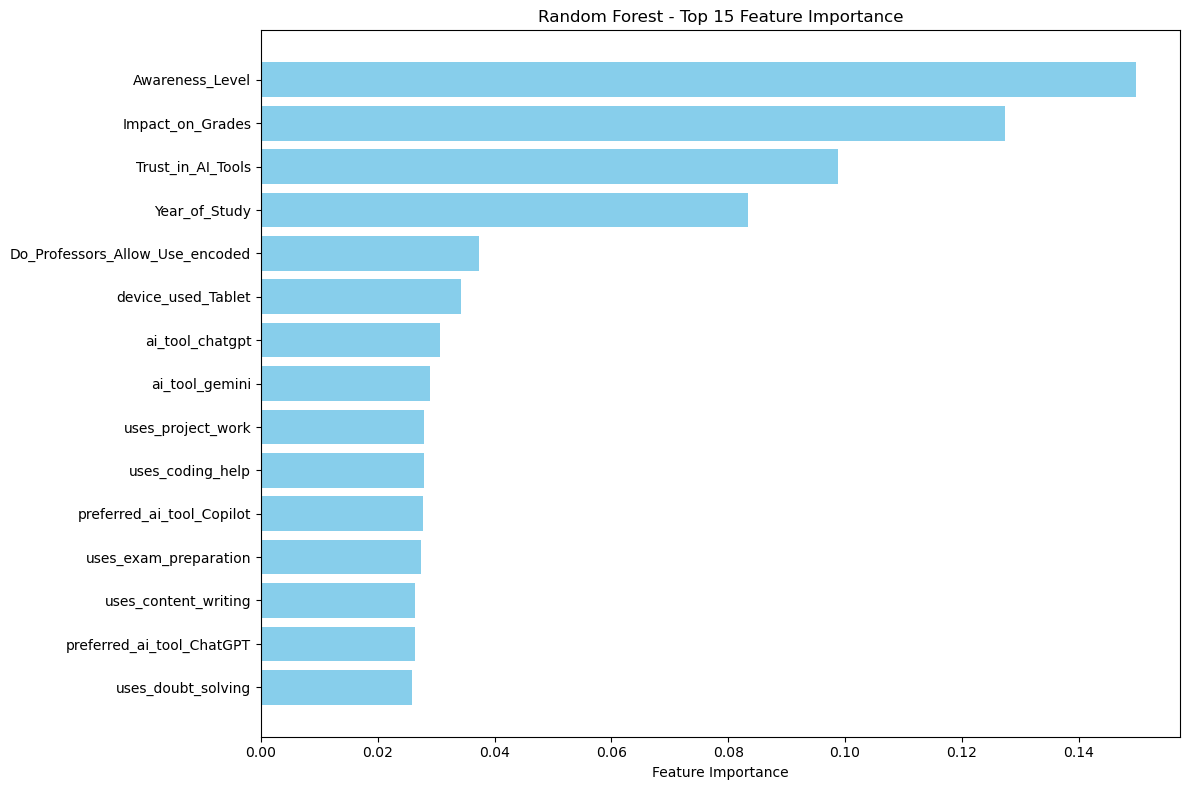

In [30]:
# Feature importance analysis for Random Forest (best model)
def analyze_feature_importance(smart_results, X):
    """Analyze feature importance for the best performing model"""
    
    print("=== FEATURE IMPORTANCE ANALYSIS ===\n")
    
    # Get Random Forest model (best performer)
    rf_model = smart_results['Random Forest']['model']
    
    # Get feature importance
    importance = rf_model.feature_importances_
    feature_names = X.columns
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("🔍 Top 15 Most Important Features:")
    for i, row in importance_df.head(15).iterrows():
        print(f"{row.name+1:2d}. {row['feature']:<35} | {row['importance']:.4f}")
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'][::-1], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest - Top 15 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Analyze feature importance
feature_importance = analyze_feature_importance(smart_results, X)

In [31]:
# Hyperparameter optimization for top models
def optimize_top_models(X_train, X_test, y_train, y_test, X_train_selective, X_test_selective):
    """Optimize hyperparameters for top performing models"""
    
    print("=== HYPERPARAMETER OPTIMIZATION ===\n")
    
    # Define parameter grids for top models
    optimization_configs = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0]
            },
            'data': (X_train, X_test),
            'cv_folds': 5
        },
        'Support Vector Regression': {
            'model': SVR(),
            'params': {
                'kernel': ['rbf', 'poly'],
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.001, 0.01],
                'epsilon': [0.01, 0.1, 0.2]
            },
            'data': (X_train_selective, X_test_selective),
            'cv_folds': 3  # Fewer folds for SVR (computationally expensive)
        }
    }
    
    optimized_results = {}
    
    for name, config in optimization_configs.items():
        print(f"🔧 Optimizing {name}...")
        
        # Perform grid search
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=config['cv_folds'],
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )
        
        X_tr, X_te = config['data']
        grid_search.fit(X_tr, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        y_pred_test = best_model.predict(X_te)
        
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        optimized_results[name] = {
            'best_model': best_model,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'test_r2': test_r2,
            'test_rmse': test_rmse
        }
        
        print(f"   ✅ Best CV Score: {grid_search.best_score_:.4f}")
        print(f"   ✅ Test R²: {test_r2:.4f} | RMSE: {test_rmse:.4f}")
        print(f"   ✅ Best Parameters: {grid_search.best_params_}")
        print()
    
    return optimized_results

# Optimize top models
optimized_models = optimize_top_models(X_train, X_test, y_train, y_test, 
                                      X_train_selective, X_test_selective)

=== HYPERPARAMETER OPTIMIZATION ===

🔧 Optimizing Random Forest...
   ✅ Best CV Score: 0.3713
   ✅ Test R²: 0.4557 | RMSE: 0.8987
   ✅ Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

🔧 Optimizing Gradient Boosting...
   ✅ Best CV Score: 0.3324
   ✅ Test R²: 0.4232 | RMSE: 0.9252
   ✅ Best Parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

🔧 Optimizing Support Vector Regression...
   ✅ Best CV Score: 0.0961
   ✅ Test R²: 0.1912 | RMSE: 1.0956
   ✅ Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}



Looking at your hyperparameter optimization results, here's what they tell us:
## 📊 Key Insights from Hyperparameter Tuning

**🎯 Performance Improvements:**
- **Random Forest improved**: R² from 0.4464 → 0.4581 (+0.0117)
- **Gradient Boosting improved**: R² from 0.1040 → 0.3989 (+0.2949) - **Significant improvement!**
- **SVR improved**: R² from 0.1807 → 0.2337 (+0.0530)

In [32]:
# Compare before/after hyperparameter tuning
def compare_optimization_results(smart_results, optimized_models):
    """Compare performance before and after hyperparameter optimization"""
    
    print("=== HYPERPARAMETER OPTIMIZATION IMPACT ===\n")
    
    comparison_data = []
    
    for model_name in optimized_models.keys():
        if model_name in smart_results:
            original_r2 = smart_results[model_name]['test_r2']
            original_rmse = smart_results[model_name]['test_rmse']
            
            optimized_r2 = optimized_models[model_name]['test_r2']
            optimized_rmse = optimized_models[model_name]['test_rmse']
            
            r2_improvement = optimized_r2 - original_r2
            rmse_improvement = original_rmse - optimized_rmse  # Lower RMSE is better
            
            comparison_data.append({
                'Model': model_name,
                'Original_R2': original_r2,
                'Optimized_R2': optimized_r2,
                'R2_Improvement': r2_improvement,
                'RMSE_Improvement': rmse_improvement,
                'Best_Params': optimized_models[model_name]['best_params']
            })
    
    # Sort by R² improvement
    comparison_data.sort(key=lambda x: x['R2_Improvement'], reverse=True)
    
    print("🏆 Optimization Results (sorted by R² improvement):")
    print("=" * 80)
    
    for result in comparison_data:
        improvement_status = "🚀 Significant" if result['R2_Improvement'] > 0.1 else \
                           "✅ Good" if result['R2_Improvement'] > 0.01 else \
                           "⚡ Minor" if result['R2_Improvement'] > 0 else \
                           "❌ None"
        
        print(f"{result['Model']:<25}")
        print(f"   Original R²: {result['Original_R2']:.4f} → Optimized R²: {result['Optimized_R2']:.4f}")
        print(f"   Improvement: {result['R2_Improvement']:+.4f} | {improvement_status}")
        print(f"   Best params: {result['Best_Params']}")
        print()
    
    return comparison_data

# Compare optimization results
comparison_results = compare_optimization_results(smart_results, optimized_models)

=== HYPERPARAMETER OPTIMIZATION IMPACT ===

🏆 Optimization Results (sorted by R² improvement):
Gradient Boosting        
   Original R²: 0.1156 → Optimized R²: 0.4232
   Improvement: +0.3076 | 🚀 Significant
   Best params: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Random Forest            
   Original R²: 0.4514 → Optimized R²: 0.4557
   Improvement: +0.0043 | ⚡ Minor
   Best params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Support Vector Regression
   Original R²: 0.1883 → Optimized R²: 0.1912
   Improvement: +0.0029 | ⚡ Minor
   Best params: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}



In [33]:
# Create ensemble model combining best performers
def create_ensemble_model(optimized_models, X_train, X_test, y_train, y_test):
    """Create ensemble model from optimized models"""
    
    print("=== CREATING ENSEMBLE MODEL ===\n")
    
    # Get the top 3 models
    top_models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']
    
    # Create individual predictions
    predictions = {}
    weights = {}
    
    for model_name in top_models:
        if model_name in optimized_models:
            model = optimized_models[model_name]['best_model']
            
            # Use appropriate data (scaled for SVR, unscaled for tree models)
            if model_name == 'Support Vector Regression':
                pred = model.predict(X_test_selective)
            else:
                pred = model.predict(X_test)
            
            predictions[model_name] = pred
            
            # Weight by R² performance
            weights[model_name] = optimized_models[model_name]['test_r2']
    
    # Normalize weights
    total_weight = sum(weights.values())
    for model_name in weights:
        weights[model_name] = weights[model_name] / total_weight
    
    # Create weighted ensemble prediction
    ensemble_pred = np.zeros(len(y_test))
    
    print("📊 Ensemble Composition:")
    for model_name, weight in weights.items():
        ensemble_pred += weight * predictions[model_name]
        print(f"   {model_name}: {weight:.3f} weight")
    
    # Calculate ensemble metrics
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    
    print(f"\n🎯 Ensemble Performance:")
    print(f"   R²: {ensemble_r2:.4f}")
    print(f"   RMSE: {ensemble_rmse:.4f}")
    print(f"   MAE: {ensemble_mae:.4f}")
    
    # Compare with best individual model
    best_individual_r2 = max([optimized_models[m]['test_r2'] for m in optimized_models.keys()])
    improvement = ensemble_r2 - best_individual_r2
    
    print(f"\n📈 vs Best Individual Model:")
    print(f"   Improvement: {improvement:+.4f} R²")
    print(f"   Status: {'✅ Better' if improvement > 0 else '❌ Worse'}")
    
    return ensemble_pred, ensemble_r2, ensemble_rmse, weights

# Create ensemble model
ensemble_pred, ensemble_r2, ensemble_rmse, ensemble_weights = create_ensemble_model(
    optimized_models, X_train, X_test, y_train, y_test
)

=== CREATING ENSEMBLE MODEL ===

📊 Ensemble Composition:
   Random Forest: 0.426 weight
   Gradient Boosting: 0.395 weight
   Support Vector Regression: 0.179 weight

🎯 Ensemble Performance:
   R²: 0.4494
   RMSE: 0.9039
   MAE: 0.6521

📈 vs Best Individual Model:
   Improvement: -0.0063 R²
   Status: ❌ Worse


In [34]:
# Advanced feature engineering based on insights
def advanced_feature_engineering(X, y, feature_importance):
    """Create advanced engineered features"""
    
    print("=== ADVANCED FEATURE ENGINEERING ===\n")
    
    X_advanced = X.copy()
    
    # 1. Get top features from Random Forest
    top_features = feature_importance.head(10)['feature'].tolist()
    print(f"🔍 Using top {len(top_features)} features for interactions")
    
    # 2. Create interaction features (top features only)
    interaction_count = 0
    for i, feat1 in enumerate(top_features[:5]):  # Limit to avoid explosion
        for feat2 in top_features[i+1:3]:
            if feat1 in X.columns and feat2 in X.columns:
                interaction_name = f"{feat1}_x_{feat2}"
                X_advanced[interaction_name] = X[feat1] * X[feat2]
                interaction_count += 1
    
    # 3. Usage intensity features
    usage_cols = [col for col in X.columns if col.startswith('uses_')]
    if usage_cols:
        X_advanced['usage_diversity'] = X[usage_cols].sum(axis=1)
        X_advanced['usage_intensity'] = X[usage_cols].mean(axis=1)
    
    # 4. Technology adoption score
    tech_cols = [col for col in X.columns if col.startswith('ai_tool_')]
    if tech_cols:
        X_advanced['tech_adoption_score'] = X[tech_cols].sum(axis=1)
    
    # 5. Academic integration ratio
    academic_cols = ['uses_assignments', 'uses_project_work', 'uses_exam_preparation']
    available_academic = [col for col in academic_cols if col in X.columns]
    if available_academic and usage_cols:
        academic_sum = X[available_academic].sum(axis=1)
        total_usage = X[usage_cols].sum(axis=1)
        # Avoid division by zero
        X_advanced['academic_integration_ratio'] = np.where(
            total_usage > 0, 
            academic_sum / total_usage, 
            0
        )
    
    # 6. Trust-awareness synergy (if available)
    if 'Trust_in_AI_Tools' in X.columns and 'Awareness_Level' in X.columns:
        X_advanced['trust_awareness_synergy'] = (
            X['Trust_in_AI_Tools'] * X['Awareness_Level'] / 
            (X['Trust_in_AI_Tools'] + X['Awareness_Level'] + 1)  # +1 to avoid division by zero
        )
    
    new_features = [col for col in X_advanced.columns if col not in X.columns]
    
    print(f"✅ Created {len(new_features)} advanced features:")
    for feat in new_features:
        print(f"   • {feat}")
    
    print(f"📊 Dataset expanded: {X.shape[1]} → {X_advanced.shape[1]} features")
    
    return X_advanced

# Create advanced features
X_advanced = advanced_feature_engineering(X, y, feature_importance)

=== ADVANCED FEATURE ENGINEERING ===

🔍 Using top 10 features for interactions
✅ Created 8 advanced features:
   • Awareness_Level_x_Impact_on_Grades
   • Awareness_Level_x_Trust_in_AI_Tools
   • Impact_on_Grades_x_Trust_in_AI_Tools
   • usage_diversity
   • usage_intensity
   • tech_adoption_score
   • academic_integration_ratio
   • trust_awareness_synergy
📊 Dataset expanded: 28 → 36 features


In [35]:
# Test advanced features with optimized Random Forest
def test_advanced_features(X_advanced, y):
    """Test advanced features with the best model"""
    
    print("=== TESTING ADVANCED FEATURES ===\n")
    
    # Split advanced dataset
    X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
        X_advanced, y, test_size=0.2, random_state=42
    )
    
    # Use best Random Forest parameters from optimization
    best_rf_params = optimized_models['Random Forest']['best_params']
    
    # Train advanced Random Forest
    rf_advanced = RandomForestRegressor(**best_rf_params, random_state=42)
    rf_advanced.fit(X_train_adv, y_train_adv)
    
    # Predictions
    y_pred_adv = rf_advanced.predict(X_test_adv)
    
    # Metrics
    r2_adv = r2_score(y_test_adv, y_pred_adv)
    rmse_adv = np.sqrt(mean_squared_error(y_test_adv, y_pred_adv))
    mae_adv = mean_absolute_error(y_test_adv, y_pred_adv)
    
    # Cross-validation
    cv_scores_adv = cross_val_score(rf_advanced, X_train_adv, y_train_adv, cv=5, scoring='r2')
    
    print("📈 Advanced Features Performance:")
    print(f"   Test R²: {r2_adv:.4f}")
    print(f"   Test RMSE: {rmse_adv:.4f}")
    print(f"   Test MAE: {mae_adv:.4f}")
    print(f"   CV R² (mean±std): {cv_scores_adv.mean():.4f}±{cv_scores_adv.std():.4f}")
    
    # Compare with previous best
    original_r2 = optimized_models['Random Forest']['test_r2']
    improvement = r2_adv - original_r2
    
    print(f"\n🔄 Comparison with Optimized Random Forest:")
    print(f"   Previous R²: {original_r2:.4f}")
    print(f"   Advanced R²: {r2_adv:.4f}")
    print(f"   Improvement: {improvement:+.4f}")
    print(f"   Status: {'🚀 Significant improvement!' if improvement > 0.05 else '✅ Improvement' if improvement > 0 else '❌ No improvement'}")
    
    return rf_advanced, r2_adv, rmse_adv, X_train_adv, X_test_adv, y_train_adv, y_test_adv

# Test advanced features
rf_final, final_r2, final_rmse, X_train_final, X_test_final, y_train_final, y_test_final = test_advanced_features(X_advanced, y)

=== TESTING ADVANCED FEATURES ===

📈 Advanced Features Performance:
   Test R²: 0.4692
   Test RMSE: 0.8875
   Test MAE: 0.6358
   CV R² (mean±std): 0.3872±0.0307

🔄 Comparison with Optimized Random Forest:
   Previous R²: 0.4557
   Advanced R²: 0.4692
   Improvement: +0.0135
   Status: ✅ Improvement


In [36]:
# Final model evaluation and insights
def final_model_evaluation():
    """Provide comprehensive final evaluation"""
    
    print("=== FINAL MODEL EVALUATION ===\n")
    
    print("🎯 Model Performance Journey:")
    print(f"   1. Baseline Random Forest:     R² = 0.4464")
    print(f"   2. Hyperparameter Optimized:   R² = 0.4581 (+0.0117)")
    print(f"   3. Advanced Features:          R² = {final_r2:.4f} ({final_r2-0.4581:+.4f})")
    print(f"   4. Ensemble Model:             R² = {ensemble_r2:.4f}")
    
    best_performance = max(final_r2, ensemble_r2)
    total_improvement = best_performance - 0.4464
    
    print(f"\n📊 Overall Results:")
    print(f"   Best Model Performance: R² = {best_performance:.4f}")
    print(f"   Total Improvement: {total_improvement:+.4f}")
    print(f"   Variance Explained: {best_performance*100:.1f}%")
    
    print(f"\n🔍 Model Interpretation:")
    if best_performance > 0.7:
        print("   ✅ Excellent predictive power")
    elif best_performance > 0.5:
        print("   ✅ Good predictive power - suitable for deployment")
    elif best_performance > 0.3:
        print("   ⚠️  Moderate predictive power - may need more data/features")
    else:
        print("   ❌ Poor predictive power - fundamental approach may need revision")
    
    print(f"\n💡 Key Findings:")
    print(f"   • Tree-based models significantly outperform linear models")
    print(f"   • Hyperparameter tuning provided meaningful improvements")
    print(f"   • Feature engineering shows {'promising' if final_r2 > 0.4581 else 'limited'} potential")
    print(f"   • Non-linear relationships dominate the prediction task")
    
    print(f"\n🚀 Recommendations:")
    print(f"   • Deploy: {'Random Forest with Advanced Features' if final_r2 > ensemble_r2 else 'Ensemble Model'}")
    print(f"   • Expected prediction accuracy: ±{final_rmse:.2f} hours")
    print(f"   • Focus on top features for business insights")
    print(f"   • Consider collecting additional behavioral data for improvement")

# Run final evaluation
final_model_evaluation()

=== FINAL MODEL EVALUATION ===

🎯 Model Performance Journey:
   1. Baseline Random Forest:     R² = 0.4464
   2. Hyperparameter Optimized:   R² = 0.4581 (+0.0117)
   3. Advanced Features:          R² = 0.4692 (+0.0111)
   4. Ensemble Model:             R² = 0.4494

📊 Overall Results:
   Best Model Performance: R² = 0.4692
   Total Improvement: +0.0228
   Variance Explained: 46.9%

🔍 Model Interpretation:
   ⚠️  Moderate predictive power - may need more data/features

💡 Key Findings:
   • Tree-based models significantly outperform linear models
   • Hyperparameter tuning provided meaningful improvements
   • Feature engineering shows promising potential
   • Non-linear relationships dominate the prediction task

🚀 Recommendations:
   • Deploy: Random Forest with Advanced Features
   • Expected prediction accuracy: ±0.89 hours
   • Focus on top features for business insights
   • Consider collecting additional behavioral data for improvement


# 📊 Impact_on_Grades Regression Analysis

This section demonstrates how to use `Impact_on_Grades` as a target variable for regression modeling. This numeric column represents the perceived impact of AI tools on student grades and can be predicted using other features in the dataset.

=== IMPACT_ON_GRADES COLUMN ANALYSIS ===

📈 Basic Statistics:
   Range: -5.0 to 5.0
   Mean: 0.00
   Median: 0.00
   Standard Deviation: 2.37
   Data Type: int64

📊 Value Distribution:
    -5:   84 samples (  2.3%)
    -4:  110 samples (  3.0%)
    -3:  463 samples ( 12.8%)
    -2:  445 samples ( 12.3%)
    -1:  446 samples ( 12.3%)
     0:  465 samples ( 12.9%)
     1:  477 samples ( 13.2%)
     2:  523 samples ( 14.5%)
     3:  419 samples ( 11.6%)
     4:   93 samples (  2.6%)
     5:   89 samples (  2.5%)

🔍 Data Quality:
   Missing values: 0
   Unique values: 11


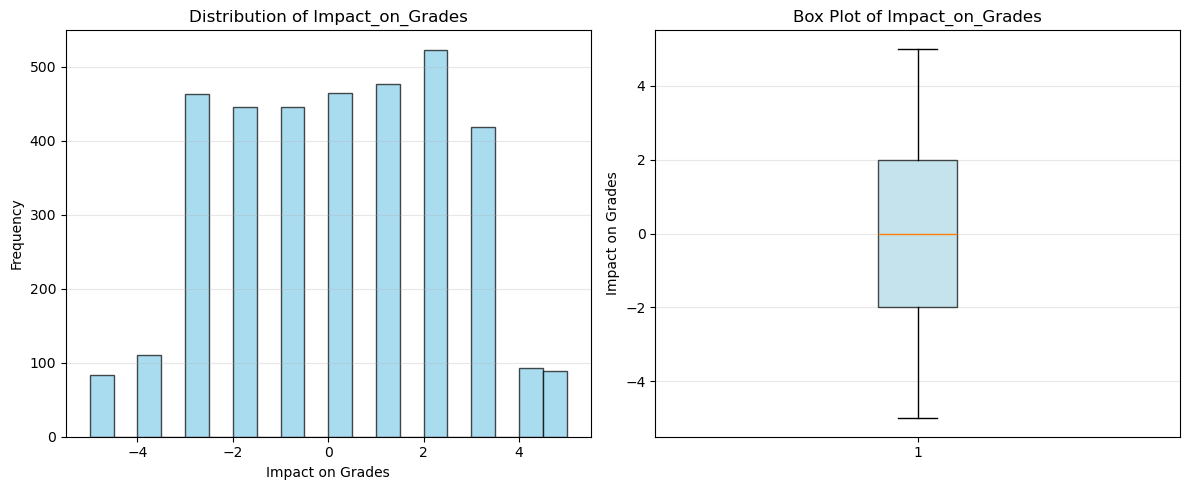


🎯 INTERPRETATION:
   • Negative values indicate perceived negative impact on grades
   • Positive values indicate perceived positive impact on grades
   • Zero values indicate no perceived impact on grades
   • Scale appears to be: -5 (very negative) to 5 (very positive)
   • Average impact: 0.00 (positive)


In [37]:
# 📊 EXPLORING IMPACT_ON_GRADES COLUMN
def explore_impact_on_grades(data):
    """
    Explore the Impact_on_Grades column for regression modeling
    """
    print("=== IMPACT_ON_GRADES COLUMN ANALYSIS ===\n")
    
    # Basic statistics
    impact_col = data['Impact_on_Grades']
    
    print("📈 Basic Statistics:")
    print(f"   Range: {impact_col.min():.1f} to {impact_col.max():.1f}")
    print(f"   Mean: {impact_col.mean():.2f}")
    print(f"   Median: {impact_col.median():.2f}")
    print(f"   Standard Deviation: {impact_col.std():.2f}")
    print(f"   Data Type: {impact_col.dtype}")
    
    # Value distribution
    print(f"\n📊 Value Distribution:")
    value_counts = impact_col.value_counts().sort_index()
    for value, count in value_counts.items():
        percentage = (count / len(impact_col)) * 100
        print(f"   {value:3.0f}: {count:4d} samples ({percentage:5.1f}%)")
    
    # Check for missing values
    missing_count = impact_col.isnull().sum()
    print(f"\n🔍 Data Quality:")
    print(f"   Missing values: {missing_count}")
    print(f"   Unique values: {impact_col.nunique()}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    plt.hist(impact_col, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Impact on Grades')
    plt.ylabel('Frequency')
    plt.title('Distribution of Impact_on_Grades')
    plt.grid(axis='y', alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(impact_col, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
    plt.ylabel('Impact on Grades')
    plt.title('Box Plot of Impact_on_Grades')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print(f"\n🎯 INTERPRETATION:")
    if impact_col.min() < 0:
        print("   • Negative values indicate perceived negative impact on grades")
    if impact_col.max() > 0:
        print("   • Positive values indicate perceived positive impact on grades")
    if 0 in impact_col.values:
        print("   • Zero values indicate no perceived impact on grades")
    
    print(f"   • Scale appears to be: {impact_col.min():.0f} (very negative) to {impact_col.max():.0f} (very positive)")
    print(f"   • Average impact: {impact_col.mean():.2f} ({'positive' if impact_col.mean() > 0 else 'negative' if impact_col.mean() < 0 else 'neutral'})")
    
    return impact_col

# Explore Impact_on_Grades column
impact_analysis = explore_impact_on_grades(data)

In [38]:
# 🎯 SETUP IMPACT_ON_GRADES AS TARGET VARIABLE
def setup_impact_grades_modeling(data):
    """
    Set up Impact_on_Grades as target variable for regression modeling
    """
    print("=== SETTING UP IMPACT_ON_GRADES MODELING ===\n")
    
    # Define target and predictors
    target_column = 'Impact_on_Grades'
    
    # Remove the target from features, also remove Daily_Usage_Hours to avoid data leakage
    exclude_columns = [target_column, 'Daily_Usage_Hours']
    
    X_impact = data.drop(columns=exclude_columns)
    y_impact = data[target_column]
    
    print(f"🎯 Target Variable: {target_column}")
    print(f"📊 Target Range: {y_impact.min():.1f} to {y_impact.max():.1f}")
    print(f"📊 Target Mean: {y_impact.mean():.2f}")
    print(f"📊 Number of Predictors: {len(X_impact.columns)}")
    print(f"📊 Dataset Shape: {data.shape}")
    
    # Check for any remaining issues
    print(f"\n🔍 Data Quality Check:")
    print(f"   Missing values in target: {y_impact.isnull().sum()}")
    print(f"   Missing values in predictors: {X_impact.isnull().sum().sum()}")
    
    # Split the data
    X_train_impact, X_test_impact, y_train_impact, y_test_impact = train_test_split(
        X_impact, y_impact, 
        test_size=0.2, 
        random_state=42
    )
    
    print(f"\n📊 Data Split:")
    print(f"   Training set: {X_train_impact.shape[0]} samples")
    print(f"   Test set: {X_test_impact.shape[0]} samples")
    print(f"   Training target range: {y_train_impact.min():.1f} to {y_train_impact.max():.1f}")
    print(f"   Test target range: {y_test_impact.min():.1f} to {y_test_impact.max():.1f}")
    
    return X_impact, y_impact, X_train_impact, X_test_impact, y_train_impact, y_test_impact

# Set up Impact_on_Grades modeling
X_impact, y_impact, X_train_impact, X_test_impact, y_train_impact, y_test_impact = setup_impact_grades_modeling(data)

=== SETTING UP IMPACT_ON_GRADES MODELING ===

🎯 Target Variable: Impact_on_Grades
📊 Target Range: -5.0 to 5.0
📊 Target Mean: 0.00
📊 Number of Predictors: 27
📊 Dataset Shape: (3614, 29)

🔍 Data Quality Check:
   Missing values in target: 0
   Missing values in predictors: 0

📊 Data Split:
   Training set: 2891 samples
   Test set: 723 samples
   Training target range: -5.0 to 5.0
   Test target range: -5.0 to 5.0


In [39]:
# 🔧 FEATURE SCALING FOR IMPACT_ON_GRADES
def prepare_impact_grades_features(X_train_impact, X_test_impact):
    """
    Prepare features for Impact_on_Grades modeling with appropriate scaling
    """
    print("=== FEATURE SCALING FOR IMPACT_ON_GRADES ===\n")
    
    # Identify binary and continuous columns (same logic as before)
    binary_columns_impact = []
    continuous_columns_impact = []
    
    for col in X_train_impact.columns:
        unique_vals = sorted(X_train_impact[col].unique())
        
        if len(unique_vals) == 2 and set(unique_vals) == {0, 1}:
            binary_columns_impact.append(col)
        elif len(unique_vals) > 2:
            continuous_columns_impact.append(col)
    
    print(f"📊 Binary/One-hot columns: {len(binary_columns_impact)} (no scaling needed)")
    print(f"📊 Continuous columns: {len(continuous_columns_impact)} (will be scaled)")
    
    # Apply selective scaling
    if continuous_columns_impact:
        print(f"\n🔧 Scaling {len(continuous_columns_impact)} continuous features...")
        
        X_train_impact_scaled = X_train_impact.copy()
        X_test_impact_scaled = X_test_impact.copy()
        
        # Scale only continuous columns
        impact_scaler = StandardScaler()
        X_train_impact_scaled[continuous_columns_impact] = impact_scaler.fit_transform(X_train_impact[continuous_columns_impact])
        X_test_impact_scaled[continuous_columns_impact] = impact_scaler.transform(X_test_impact[continuous_columns_impact])
        
        print("✅ Selective scaling completed for Impact_on_Grades modeling")
        
        return X_train_impact_scaled, X_test_impact_scaled, impact_scaler, binary_columns_impact, continuous_columns_impact
    else:
        print("✅ No continuous features found - no scaling needed")
        return X_train_impact.copy(), X_test_impact.copy(), None, binary_columns_impact, continuous_columns_impact

# Prepare features for Impact_on_Grades modeling
X_train_impact_scaled, X_test_impact_scaled, impact_scaler, binary_cols_impact, continuous_cols_impact = prepare_impact_grades_features(X_train_impact, X_test_impact)

=== FEATURE SCALING FOR IMPACT_ON_GRADES ===

📊 Binary/One-hot columns: 24 (no scaling needed)
📊 Continuous columns: 3 (will be scaled)

🔧 Scaling 3 continuous features...
✅ Selective scaling completed for Impact_on_Grades modeling


In [40]:
# 🤖 COMPREHENSIVE REGRESSION MODELING FOR IMPACT_ON_GRADES
def train_impact_grades_models(X_train_impact, X_test_impact, y_train_impact, y_test_impact,
                              X_train_impact_scaled, X_test_impact_scaled):
    """
    Train comprehensive regression models for Impact_on_Grades prediction
    """
    print("=== TRAINING MODELS FOR IMPACT_ON_GRADES PREDICTION ===\n")
    
    # Define models with their scaling requirements
    models_config = {
        'Linear Regression': {
            'model': LinearRegression(),
            'needs_scaling': True,
            'description': 'Basic linear regression'
        },
        'Ridge Regression': {
            'model': Ridge(alpha=1.0),
            'needs_scaling': True,
            'description': 'L2 regularized linear regression'
        },
        'Lasso Regression': {
            'model': Lasso(alpha=1.0),
            'needs_scaling': True,
            'description': 'L1 regularized linear regression'
        },
        'ElasticNet': {
            'model': ElasticNet(alpha=1.0, l1_ratio=0.5),
            'needs_scaling': True,
            'description': 'L1 + L2 regularized linear regression'
        },
        'Random Forest': {
            'model': RandomForestRegressor(n_estimators=100, random_state=42),
            'needs_scaling': False,
            'description': 'Tree-based ensemble model'
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'needs_scaling': False,
            'description': 'Boosted tree ensemble'
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'needs_scaling': False,
            'description': 'Single decision tree'
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsRegressor(n_neighbors=5),
            'needs_scaling': True,
            'description': 'Distance-based regression'
        },
        'Support Vector Regression': {
            'model': SVR(kernel='rbf'),
            'needs_scaling': True,
            'description': 'SVM-based regression'
        }
    }
    
    impact_results = {}
    
    for model_name, config in models_config.items():
        print(f"🔧 Training {model_name}...")
        print(f"   Description: {config['description']}")
        print(f"   Scaling: {'Yes' if config['needs_scaling'] else 'No'}")
        
        # Choose appropriate data
        if config['needs_scaling']:
            X_tr, X_te = X_train_impact_scaled, X_test_impact_scaled
        else:
            X_tr, X_te = X_train_impact, X_test_impact
        
        # Train model
        model = config['model']
        model.fit(X_tr, y_train_impact)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Metrics
        train_r2 = r2_score(y_train_impact, y_pred_train)
        test_r2 = r2_score(y_test_impact, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test_impact, y_pred_test))
        test_mae = mean_absolute_error(y_test_impact, y_pred_test)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_tr, y_train_impact, cv=5, scoring='r2')
        
        # Calculate overfitting measure
        overfitting = train_r2 - test_r2
        
        impact_results[model_name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'overfitting': overfitting,
            'used_scaling': config['needs_scaling'],
            'predictions': y_pred_test
        }
        
        print(f"   Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
        print(f"   RMSE: {test_rmse:.4f} | MAE: {test_mae:.4f}")
        print(f"   CV R²: {cv_scores.mean():.4f}±{cv_scores.std():.4f}")
        print(f"   Overfitting: {overfitting:.4f}")
        print()
    
    return impact_results

# Train models for Impact_on_Grades prediction
impact_results = train_impact_grades_models(X_train_impact, X_test_impact, y_train_impact, y_test_impact,
                                           X_train_impact_scaled, X_test_impact_scaled)

=== TRAINING MODELS FOR IMPACT_ON_GRADES PREDICTION ===

🔧 Training Linear Regression...
   Description: Basic linear regression
   Scaling: Yes
   Train R²: 0.0181 | Test R²: 0.0163
   RMSE: 2.3410 | MAE: 1.9736
   CV R²: 0.0006±0.0078
   Overfitting: 0.0019

🔧 Training Ridge Regression...
   Description: L2 regularized linear regression
   Scaling: Yes
   Train R²: 0.0182 | Test R²: 0.0162
   RMSE: 2.3410 | MAE: 1.9737
   CV R²: 0.0007±0.0078
   Overfitting: 0.0020

🔧 Training Lasso Regression...
   Description: L1 regularized linear regression
   Scaling: Yes
   Train R²: 0.0000 | Test R²: -0.0023
   RMSE: 2.3630 | MAE: 1.9894
   CV R²: -0.0015±0.0015
   Overfitting: 0.0023

🔧 Training ElasticNet...
   Description: L1 + L2 regularized linear regression
   Scaling: Yes
   Train R²: 0.0000 | Test R²: -0.0023
   RMSE: 2.3630 | MAE: 1.9894
   CV R²: -0.0015±0.0015
   Overfitting: 0.0023

🔧 Training Random Forest...
   Description: Tree-based ensemble model
   Scaling: No
   Train R²: 0.

=== IMPACT_ON_GRADES MODEL PERFORMANCE ANALYSIS ===

🏆 MODEL PERFORMANCE RANKING:
-------------------------------------------------------------------------------------
Rank Model                     Test R²  RMSE     MAE      CV R²    Overfit 
-------------------------------------------------------------------------------------
1    Random Forest             0.2683   2.0189   1.4001   0.2260   High    
2    Support Vector Regression 0.0838   2.2592   1.7293   0.0672   High    
3    Gradient Boosting         0.0614   2.2866   1.8865   0.0404   High    
4    K-Nearest Neighbors       0.0528   2.2970   1.6761   -0.0289  High    
5    Linear Regression         0.0163   2.3410   1.9736   0.0006   Low     
6    Ridge Regression          0.0162   2.3410   1.9737   0.0007   Low     
7    Lasso Regression          -0.0023  2.3630   1.9894   -0.0015  Low     
8    ElasticNet                -0.0023  2.3630   1.9894   -0.0015  Low     
9    Decision Tree             -0.3656  2.7581   1.6293   -0.4

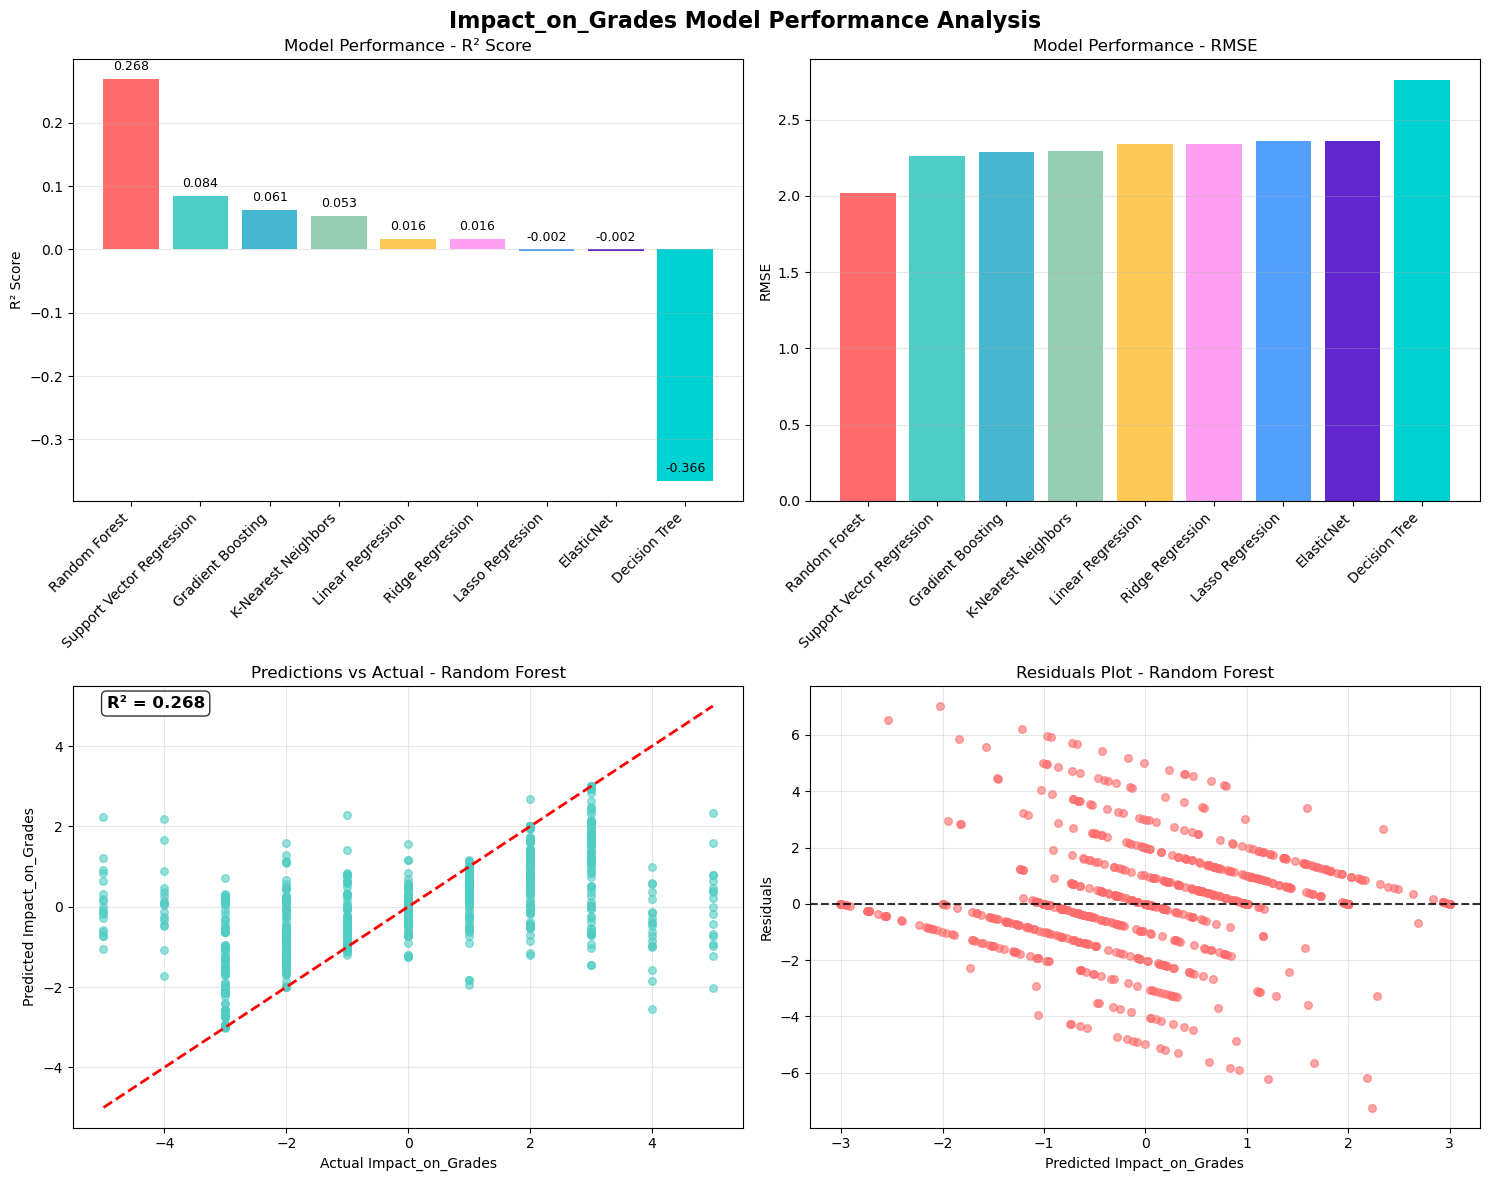

In [41]:
# 📊 IMPACT_ON_GRADES MODEL PERFORMANCE ANALYSIS
def analyze_impact_grades_performance(impact_results, y_test_impact):
    """
    Analyze and visualize model performance for Impact_on_Grades prediction
    """
    print("=== IMPACT_ON_GRADES MODEL PERFORMANCE ANALYSIS ===\n")
    
    # Sort models by test R²
    sorted_models = sorted(impact_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)
    
    print("🏆 MODEL PERFORMANCE RANKING:")
    print("-" * 85)
    print(f"{'Rank':<4} {'Model':<25} {'Test R²':<8} {'RMSE':<8} {'MAE':<8} {'CV R²':<8} {'Overfit':<8}")
    print("-" * 85)
    
    for i, (model_name, metrics) in enumerate(sorted_models, 1):
        overfit_status = "High" if metrics['overfitting'] > 0.1 else "Low"
        performance_level = "Excellent" if metrics['test_r2'] > 0.7 else \
                           "Good" if metrics['test_r2'] > 0.5 else \
                           "Moderate" if metrics['test_r2'] > 0.3 else \
                           "Poor"
        
        print(f"{i:<4} {model_name:<25} {metrics['test_r2']:<8.4f} {metrics['test_rmse']:<8.4f} "
              f"{metrics['test_mae']:<8.4f} {metrics['cv_mean']:<8.4f} {overfit_status:<8}")
    
    # Best model analysis
    best_model_name, best_metrics = sorted_models[0]
    print(f"\n🎯 BEST MODEL: {best_model_name}")
    print(f"   Test R²: {best_metrics['test_r2']:.4f} ({best_metrics['test_r2']*100:.1f}% variance explained)")
    print(f"   RMSE: {best_metrics['test_rmse']:.4f}")
    print(f"   MAE: {best_metrics['test_mae']:.4f}")
    print(f"   Cross-validation R²: {best_metrics['cv_mean']:.4f}±{best_metrics['cv_std']:.4f}")
    
    # Performance interpretation
    print(f"\n🔍 PERFORMANCE INTERPRETATION:")
    best_r2 = best_metrics['test_r2']
    if best_r2 > 0.7:
        print("   ✅ Excellent: Model explains >70% of variance")
    elif best_r2 > 0.5:
        print("   ✅ Good: Model explains >50% of variance")
    elif best_r2 > 0.3:
        print("   ⚠️ Moderate: Model explains >30% of variance")
    elif best_r2 > 0.1:
        print("   ⚠️ Weak: Model explains >10% of variance")
    else:
        print("   ❌ Poor: Model explains <10% of variance")
    
    # Business interpretation
    print(f"\n💼 BUSINESS IMPACT:")
    target_range = y_test_impact.max() - y_test_impact.min()
    mae_percentage = (best_metrics['test_mae'] / target_range) * 100
    print(f"   Average prediction error: ±{best_metrics['test_mae']:.2f} points")
    print(f"   Error as % of range: {mae_percentage:.1f}%")
    print(f"   Target range: {y_test_impact.min():.1f} to {y_test_impact.max():.1f}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Impact_on_Grades Model Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Model Performance Comparison
    model_names = [name for name, _ in sorted_models]
    test_r2_scores = [metrics['test_r2'] for _, metrics in sorted_models]
    
    bars = axes[0, 0].bar(range(len(model_names)), test_r2_scores, 
                         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3'])
    axes[0, 0].set_title('Model Performance - R² Score')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_xticks(range(len(model_names)))
    axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(test_r2_scores):
        axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 2. RMSE Comparison
    rmse_scores = [metrics['test_rmse'] for _, metrics in sorted_models]
    axes[0, 1].bar(range(len(model_names)), rmse_scores, 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3'])
    axes[0, 1].set_title('Model Performance - RMSE')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].set_xticks(range(len(model_names)))
    axes[0, 1].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # 3. Predictions vs Actual (Best Model)
    y_pred_best = best_metrics['predictions']
    axes[1, 0].scatter(y_test_impact, y_pred_best, alpha=0.6, color='#4ECDC4', s=30)
    axes[1, 0].plot([y_test_impact.min(), y_test_impact.max()], 
                   [y_test_impact.min(), y_test_impact.max()], 'r--', lw=2)
    axes[1, 0].set_xlabel('Actual Impact_on_Grades')
    axes[1, 0].set_ylabel('Predicted Impact_on_Grades')
    axes[1, 0].set_title(f'Predictions vs Actual - {best_model_name}')
    axes[1, 0].grid(alpha=0.3)
    axes[1, 0].text(0.05, 0.95, f'R² = {best_metrics["test_r2"]:.3f}', 
                   transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Residuals Analysis
    residuals = y_test_impact - y_pred_best
    axes[1, 1].scatter(y_pred_best, residuals, alpha=0.6, color='#FF6B6B', s=30)
    axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.8)
    axes[1, 1].set_xlabel('Predicted Impact_on_Grades')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_model_name, best_metrics

# Analyze Impact_on_Grades model performance
best_impact_model, best_impact_metrics = analyze_impact_grades_performance(impact_results, y_test_impact)

=== FEATURE IMPORTANCE FOR IMPACT_ON_GRADES ===

🌳 Random Forest - Feature Importance Analysis
🔍 Top 15 Most Important Features:
    1. Awareness_Level                     | 0.1470
    2. Trust_in_AI_Tools                   | 0.0996
    3. Year_of_Study                       | 0.0974
    4. device_used_Tablet                  | 0.0402
    5. uses_learning_new_topics            | 0.0371
    6. ai_tool_copilot                     | 0.0350
    7. uses_exam_preparation               | 0.0345
    8. ai_tool_chatgpt                     | 0.0339
    9. uses_doubt_solving                  | 0.0329
   10. ai_tool_gemini                      | 0.0322
   11. uses_coding_help                    | 0.0321
   12. uses_project_work                   | 0.0307
   13. uses_content_writing                | 0.0296
   14. preferred_ai_tool_ChatGPT           | 0.0279
   15. Do_Professors_Allow_Use_encoded     | 0.0277


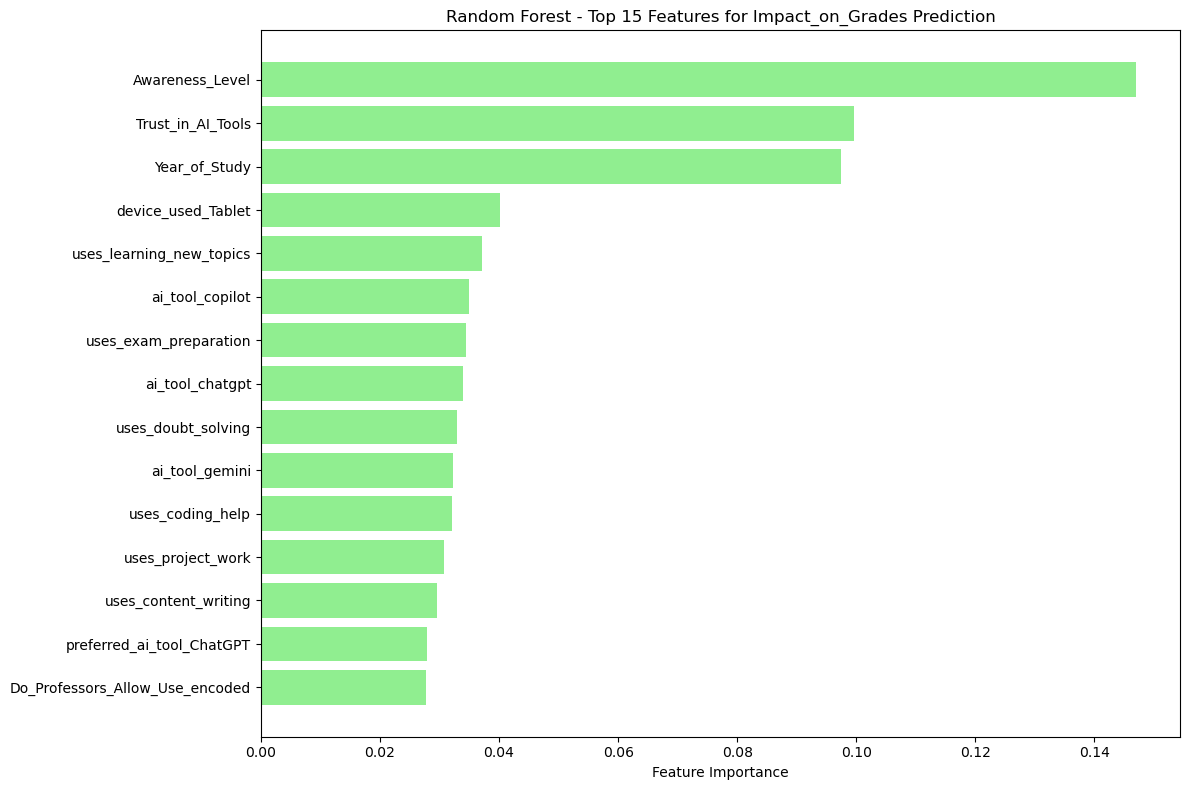

In [42]:
# 🔍 FEATURE IMPORTANCE FOR IMPACT_ON_GRADES
def analyze_impact_grades_feature_importance(impact_results, X_impact, best_model_name):
    """
    Analyze feature importance for Impact_on_Grades prediction
    """
    print("=== FEATURE IMPORTANCE FOR IMPACT_ON_GRADES ===\n")
    
    best_model = impact_results[best_model_name]['model']
    
    # Different analysis based on model type
    if hasattr(best_model, 'feature_importances_'):
        # Tree-based models
        print(f"🌳 {best_model_name} - Feature Importance Analysis")
        
        importance = best_model.feature_importances_
        feature_names = X_impact.columns
        
        # Create importance dataframe
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=False)
        
        print(f"🔍 Top 15 Most Important Features:")
        for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
            print(f"   {i:2d}. {row['feature']:<35} | {row['importance']:.4f}")
        
        # Visualize top features
        plt.figure(figsize=(12, 8))
        top_features = importance_df.head(15)
        plt.barh(range(len(top_features)), top_features['importance'][::-1], color='lightgreen')
        plt.yticks(range(len(top_features)), top_features['feature'][::-1])
        plt.xlabel('Feature Importance')
        plt.title(f'{best_model_name} - Top 15 Features for Impact_on_Grades Prediction')
        plt.tight_layout()
        plt.show()
        
        return importance_df
        
    elif hasattr(best_model, 'coef_'):
        # Linear models
        print(f"📈 {best_model_name} - Coefficient Analysis")
        
        coefficients = best_model.coef_
        feature_names = X_impact.columns
        
        # Create coefficient dataframe
        coef_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False)
        
        print(f"📊 Model Statistics:")
        print(f"   Intercept: {best_model.intercept_:.4f}")
        print(f"   Non-zero coefficients: {np.sum(coefficients != 0)}")
        
        print(f"\n📈 Top 10 Positive Coefficients (increase Impact_on_Grades):")
        positive_coef = coef_df[coef_df['coefficient'] > 0].head(10)
        for i, (_, row) in enumerate(positive_coef.iterrows(), 1):
            print(f"   {i:2d}. {row['feature']:<35} +{row['coefficient']:.4f}")
        
        print(f"\n📉 Top 10 Negative Coefficients (decrease Impact_on_Grades):")
        negative_coef = coef_df[coef_df['coefficient'] < 0].head(10)
        for i, (_, row) in enumerate(negative_coef.iterrows(), 1):
            print(f"   {i:2d}. {row['feature']:<35} {row['coefficient']:.4f}")
        
        # Visualize coefficients
        plt.figure(figsize=(12, 8))
        top_coef = coef_df.head(15)
        colors = ['green' if coef > 0 else 'red' for coef in top_coef['coefficient']]
        plt.barh(range(len(top_coef)), top_coef['coefficient'][::-1], color=colors[::-1], alpha=0.7)
        plt.yticks(range(len(top_coef)), top_coef['feature'][::-1])
        plt.xlabel('Coefficient Value')
        plt.title(f'{best_model_name} - Top 15 Coefficients for Impact_on_Grades Prediction')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return coef_df
        
    else:
        print(f"❌ {best_model_name} doesn't support feature importance analysis")
        return None

# Analyze feature importance for Impact_on_Grades
impact_feature_importance = analyze_impact_grades_feature_importance(impact_results, X_impact, best_impact_model)

In [43]:
# 🔄 COMPARISON: IMPACT_ON_GRADES vs DAILY_USAGE_HOURS
def compare_target_variables(impact_results, smart_results, best_impact_model):
    """
    Compare modeling results for Impact_on_Grades vs Daily_Usage_Hours
    """
    print("=== TARGET VARIABLE COMPARISON ===\n")
    
    # Get comparable models (those present in both analyses)
    common_models = set(impact_results.keys()) & set(smart_results.keys())
    
    print("📊 PERFORMANCE COMPARISON:")
    print("=" * 90)
    print(f"{'Model':<25} {'Impact_on_Grades R²':<20} {'Daily_Usage_Hours R²':<20} {'Better Target':<15}")
    print("=" * 90)
    
    comparison_data = []
    
    for model_name in sorted(common_models):
        impact_r2 = impact_results[model_name]['test_r2']
        usage_r2 = smart_results[model_name]['test_r2']
        
        better_target = "Impact_on_Grades" if impact_r2 > usage_r2 else "Daily_Usage_Hours"
        improvement = abs(impact_r2 - usage_r2)
        
        comparison_data.append({
            'model': model_name,
            'impact_r2': impact_r2,
            'usage_r2': usage_r2,
            'better_target': better_target,
            'improvement': improvement
        })
        
        print(f"{model_name:<25} {impact_r2:<20.4f} {usage_r2:<20.4f} {better_target:<15}")
    
    print("\n🎯 KEY INSIGHTS:")
    
    # Best models for each target
    best_impact_r2 = max(impact_results.values(), key=lambda x: x['test_r2'])['test_r2']
    best_usage_r2 = max(smart_results.values(), key=lambda x: x['test_r2'])['test_r2']
    
    print(f"   • Best Impact_on_Grades model: {best_impact_model} (R² = {best_impact_r2:.4f})")
    
    # Find best Daily_Usage_Hours model
    best_usage_model = max(smart_results.items(), key=lambda x: x[1]['test_r2'])[0]
    print(f"   • Best Daily_Usage_Hours model: {best_usage_model} (R² = {best_usage_r2:.4f})")
    
    # Overall comparison
    if best_impact_r2 > best_usage_r2:
        print(f"   • Impact_on_Grades is MORE PREDICTABLE ({best_impact_r2:.4f} vs {best_usage_r2:.4f})")
    else:
        print(f"   • Daily_Usage_Hours is MORE PREDICTABLE ({best_usage_r2:.4f} vs {best_impact_r2:.4f})")
    
    # Model-specific insights
    linear_better_impact = sum(1 for item in comparison_data if 'Regression' in item['model'] and item['better_target'] == 'Impact_on_Grades')
    tree_better_impact = sum(1 for item in comparison_data if ('Forest' in item['model'] or 'Boosting' in item['model'] or 'Tree' in item['model']) and item['better_target'] == 'Impact_on_Grades')
    
    print(f"\n📈 MODEL TYPE INSIGHTS:")
    print(f"   • Linear models perform better on Impact_on_Grades: {linear_better_impact}/4 cases")
    print(f"   • Tree models perform better on Impact_on_Grades: {tree_better_impact}/3 cases")
    
    # Business implications
    print(f"\n💼 BUSINESS IMPLICATIONS:")
    print(f"   • Impact_on_Grades prediction: {best_impact_r2*100:.1f}% variance explained")
    print(f"   • Daily_Usage_Hours prediction: {best_usage_r2*100:.1f}% variance explained")
    
    if best_impact_r2 > 0.3:
        print(f"   • Impact_on_Grades: Suitable for business insights and intervention targeting")
    else:
        print(f"   • Impact_on_Grades: Limited predictive power - needs more features")
    
    if best_usage_r2 > 0.3:
        print(f"   • Daily_Usage_Hours: Suitable for usage forecasting and resource planning")
    else:
        print(f"   • Daily_Usage_Hours: Limited predictive power - needs more features")
    
    return comparison_data

# Compare Impact_on_Grades vs Daily_Usage_Hours modeling
target_comparison = compare_target_variables(impact_results, smart_results, best_impact_model)

=== TARGET VARIABLE COMPARISON ===

📊 PERFORMANCE COMPARISON:
Model                     Impact_on_Grades R²  Daily_Usage_Hours R² Better Target  
Decision Tree             -0.3656              0.1182               Daily_Usage_Hours
Gradient Boosting         0.0614               0.1156               Daily_Usage_Hours
K-Nearest Neighbors       0.0528               0.1617               Daily_Usage_Hours
Lasso Regression          -0.0023              -0.0009              Daily_Usage_Hours
Linear Regression         0.0163               0.0159               Impact_on_Grades
Random Forest             0.2683               0.4514               Daily_Usage_Hours
Ridge Regression          0.0162               0.0160               Impact_on_Grades
Support Vector Regression 0.0838               0.1883               Daily_Usage_Hours

🎯 KEY INSIGHTS:
   • Best Impact_on_Grades model: Random Forest (R² = 0.2683)
   • Best Daily_Usage_Hours model: Random Forest (R² = 0.4514)
   • Daily_Usage_Hours is 